# FELLOWS OCTOBER 2020 COHORT FINAL EXAM - section 2/2 (coding)

In this question you will perform binary classification using the given dataset (`oct_2020_final_dataset.csv`).

Please submit your solution as a Jupyter notebook. Make sure to restart and run the notebook before submitting to make sure that it runs as-is.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Q1: Load the dataset in `oct_2020_final_dataset.csv`. Perform light EDA and standard preprocessing on the data, including splitting the data into train-valid-test sets.
##### Note that the `target` column is the target variable that we will be predicting.

In [2]:
df = pd.read_csv('oct_2020_final_dataset.csv')
df.head(10)

C:\Users\RUBENS\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (5,7,14,15,20,25,26,34,36,37,39,41,45,54,59,64,65,67,68,69,75,85,88,89,92,102,116,124,126,128,129,131,138,139,141,142,147,149,166,169,173,179,182,183,194,195) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


,MYZ,KPI,JKC,BFG,QOY,NJG,UKJ,DDW,LOY,TFM,...,TJG,XCO,VWQ,HRE,KPP,GYM,CLH,SDW,ERM,target
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0.0
1,0,0,0,0,1,1,0,0,0,0,...,0,0,0,1,0,0,0,1,0,1.0
2,0,0,1,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0.0
3,0,0,0,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,0.0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0.0
5,0,1,0,0,1,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0.0
6,0,0,0,1,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1.0
7,0,0,0,0,0,0,1,1,0,0,...,0,0,0,1,0,0,0,0,1,0.0
8,0,0,0,0,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0.0
9,0,0,0,0,1,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0.0


In [3]:
df.shape

(5500, 201)

In [4]:
numerical_feats = df.dtypes[df.dtypes != "object"].index
print("Number of Numerical features: ", len(numerical_feats))
categorical_feats = df.dtypes[df.dtypes == "object"].index
print("Number of Categorical features: ", len(categorical_feats))

Number of Numerical features:  152
Number of Categorical features:  49


In [5]:
categorical_feats

Index(['NJG', 'DDW', 'URJ', 'TVG', 'DWT', 'AVC', 'ZCD', 'VWK', 'BRZ', 'KRT',
       'GUT', 'RHG', 'OTE', 'OFQ', 'JYO', 'BRG', 'KQH', 'MRB', 'KUL', 'UMA',
       'TVJ', 'WLA', 'ITQ', 'JFB', 'ZWE', 'IUZ', 'LVH', 'RKC', 'QIM', 'VBX',
       'OEY', 'VQI', 'DMT', 'TFP', 'ZJY', 'NIR', 'XMB', 'GWL', 'ZYJ', 'CUI',
       'SXM', 'ROX', 'YJF', 'MWW', 'LBN', 'EIJ', 'BGN', 'HRE', 'KPP'],
      dtype='object')

In [6]:
(df.nunique()>2).any()

True

In [7]:
for i in df.columns:
    if df[i].nunique() >2:
        print(i)

NJG
DDW
URJ
TVG
DWT
AVC
ZCD
VWK
BRZ
KRT
GUT
RHG
OTE
OFQ
JYO
BRG
KQH
MRB
KUL
UMA
TVJ
WLA
ITQ
JFB
ZWE
IUZ
LVH
RKC
QIM
VBX
OEY
VQI
DMT
TFP
ZJY
NIR
XMB
GWL
ZYJ
CUI
SXM
ROX
YJF
MWW
LBN
EIJ
BGN
HRE
KPP


In [8]:
df['NJG'].value_counts()

0          3452
0          1190
1           643
1           214
#VALUE!       1
Name: NJG, dtype: int64

In [9]:
for col in categorical_feats:
    df = df[df[col] !='#VALUE!']

In [10]:
df.isnull().sum()

MYZ        0
KPI        0
JKC        0
BFG        0
QOY        0
          ..
GYM        0
CLH        0
SDW        0
ERM        0
target    50
Length: 201, dtype: int64

In [11]:
df = df.dropna()

In [12]:
df = df.astype(int)

In [13]:
assert (df.nunique()==2).all()

In [14]:
df.describe()

,MYZ,KPI,JKC,BFG,QOY,NJG,UKJ,DDW,LOY,TFM,...,TJG,XCO,VWQ,HRE,KPP,GYM,CLH,SDW,ERM,target
count,5389.000000,5389.000000,5389.000000,5389.000000,5389.000000,5389.000000,5389.000000,5389.000000,5389.000000,5389.000000,...,5389.000000,5389.000000,5389.000000,5389.00000,5389.000000,5389.000000,5389.000000,5389.000000,5389.000000,5389.000000
mean,0.150677,0.158285,0.149564,0.161997,0.149378,0.156244,0.159584,0.157172,0.159028,0.159955,...,0.158657,0.163667,0.166079,0.16311,0.162182,0.156615,0.146038,0.165893,0.152719,0.134162
std,0.357767,0.365042,0.356677,0.368482,0.356494,0.363120,0.366254,0.363997,0.365736,0.366599,...,0.365389,0.370007,0.372186,0.36950,0.368652,0.363471,0.353177,0.372020,0.359749,0.340858
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5389 entries, 0 to 5499
Columns: 201 entries, MYZ to target
dtypes: int32(201)
memory usage: 4.2 MB


In [16]:
df['target'].value_counts(normalize=True)

0    0.865838
1    0.134162
Name: target, dtype: float64

We can see that the data is unbalanced so accuracy will not be a good metrics for our classifier

#### 2. Perform EDA

- perform EDA just on some random columns to see some distribution about the data

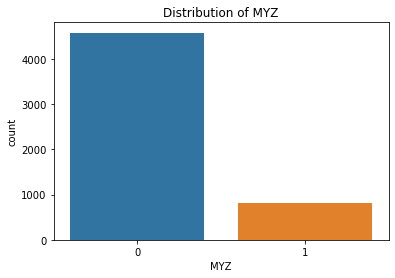

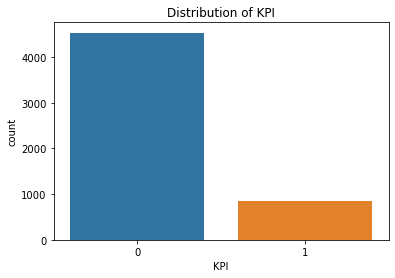

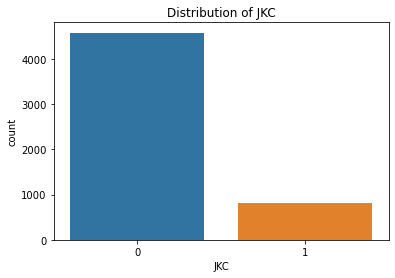

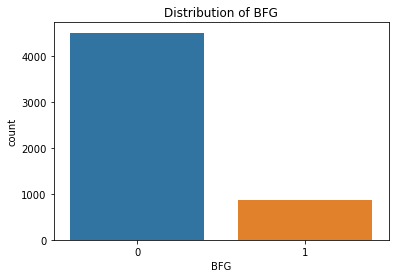

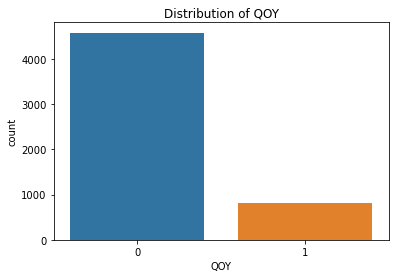

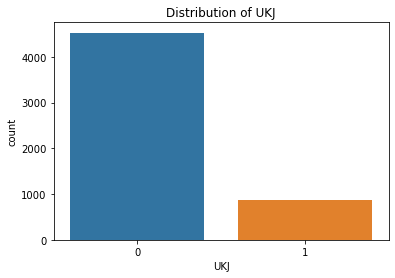

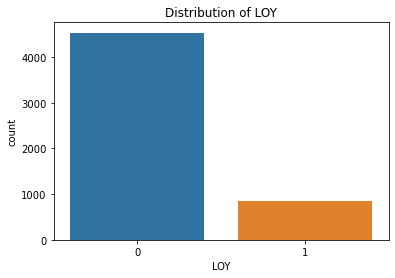

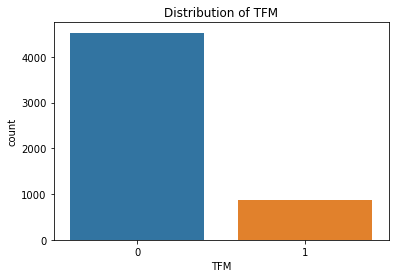

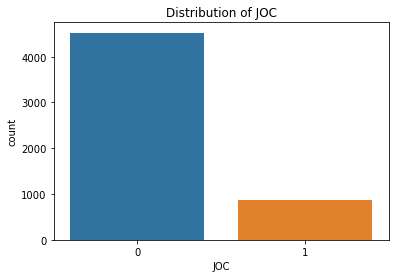

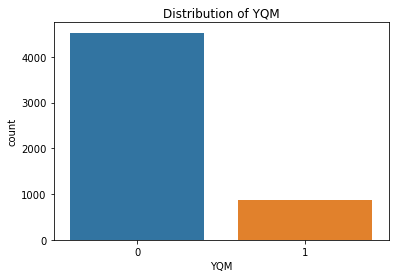

In [17]:
cat_vars = ['MYZ', 'KPI', 'JKC', 'BFG', 'QOY', 'UKJ', 'LOY', 'TFM', 'JOC', 'YQM']
for cat_var in cat_vars:
    ax = sns.countplot(x = cat_var, data=df)
    plt.title('Distribution of {}'.format(cat_var))
    plt.show();

Just a small subset of the dataset, show the correlation (too much features i can't do it with the all dataset now)

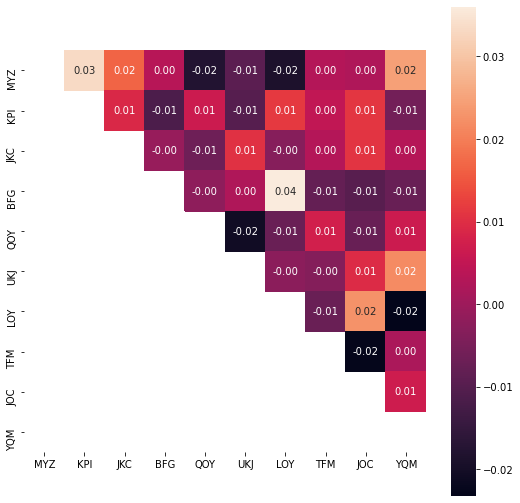

In [18]:
fig = plt.figure(figsize=(9,9))
mask = np.tril(np.ones_like(df[cat_vars].corr(), dtype=np.bool))
ax = sns.heatmap(df[cat_vars].corr(), annot=True, fmt=".2f", mask = mask, square = True)

## Q2: Use a Logistic Regression model to predict the target variable. Using the validation set, create and plot an ROC curve, and calculate the AUC.

In [19]:
from sklearn.model_selection import train_test_split
target = 'target'
features = list(set(df.columns)-set([target]))
X = df[features]
y = df[target]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [20]:
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.5)

In [21]:
X_train.shape[0]/len(df), X_test.shape[0]/len(df), X_val.shape[0]/len(df)

(0.7498608276118018, 0.12506958619409908, 0.12506958619409908)

In [22]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train, y_train)

In [23]:
y_pred = clf.predict(X_test)
clf.score(X_test,y_test)

0.8827893175074184

In [24]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred)

array([[577,  11],
       [ 68,  18]], dtype=int64)

In [25]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.89      0.98      0.94       588
           1       0.62      0.21      0.31        86

    accuracy                           0.88       674
   macro avg       0.76      0.60      0.62       674
weighted avg       0.86      0.88      0.86       674



In [26]:
y_probs = clf.predict_proba(X_val)
y_probs.shape

(674, 2)

In [27]:
y_score= y_probs[:,1]

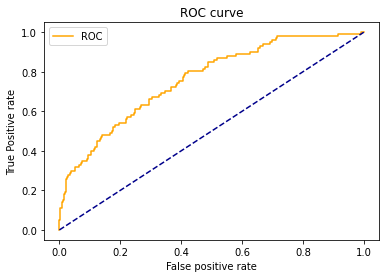

In [28]:
from sklearn.metrics import roc_curve, precision_recall_curve, roc_auc_score
from matplotlib import pyplot as plt
import seaborn as sns


fpr, tpr, threshold = roc_curve(y_val, y_score)  
plt.plot(fpr,tpr,color='orange',label ='ROC')
plt.plot([0,1],[0,1],color='darkblue',linestyle ='--')
plt.xlabel('False positive rate')
plt.ylabel('True Positive rate')
plt.title('ROC curve')
plt.legend()
plt.show()

In [29]:
roc_auc_score(y_val, y_score)

0.7590525793650793

## Q3: For the business problem that you are solving, TPR and FPR are about equally important. Use this to decide on a threshold value for the classifier, and report this classifier's metrics on the test data.

In [30]:
index = np.argmax(tpr - fpr)
index

108

In [31]:
tpr[86]-fpr[86]

0.36812641723356004

In [32]:
tresh = threshold[index]
tresh

0.09190596554411631

In [33]:
y_probs_test = clf.predict_proba(X_test)
confusion_matrix(y_test, (y_probs_test[:, 1] > tresh).astype(int)) 

array([[349, 239],
       [ 19,  67]], dtype=int64)

In [34]:
print(classification_report(y_test, (y_probs_test[:, 1] > tresh).astype(int)))

              precision    recall  f1-score   support

           0       0.95      0.59      0.73       588
           1       0.22      0.78      0.34        86

    accuracy                           0.62       674
   macro avg       0.58      0.69      0.54       674
weighted avg       0.86      0.62      0.68       674



## Q4: What are the 50 most important features for this classifier's decisions?

In [35]:
ind = clf.coef_[0].argsort()[-50:][::-1]
most_important = X_train.iloc[:,ind].columns
most_important

Index(['KJP', 'QVE', 'ACR', 'HRE', 'TFP', 'MPV', 'DBA', 'FSE', 'BFG', 'UKJ',
       'GWL', 'NVV', 'CFN', 'FSB', 'NLR', 'ZRQ', 'PSN', 'IXY', 'NDS', 'TJG',
       'KQH', 'SND', 'XMB', 'XJK', 'DHC', 'HLS', 'BRG', 'SJQ', 'ZCD', 'YTX',
       'UVC', 'WRK', 'VQI', 'NJG', 'VKV', 'TPA', 'JLT', 'RKG', 'YXG', 'ROX',
       'PED', 'YQM', 'YEJ', 'JKC', 'ECH', 'CLH', 'PXM', 'TVG', 'OXZ', 'RSK'],
      dtype='object')

In [36]:
X_train_important = X_train[most_important]
X_test_important = X_test[most_important]

## Q5: Retrain the classifier only using these 50 features. What are its metrics on the test data now? Was it significantly affected by this feature selection?

In [37]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression().fit(X_train_important, y_train)
y_pred_1 = clf.predict(X_test_important)
clf.score(X_test_important,y_test)

0.8738872403560831

In [38]:
from sklearn.metrics import confusion_matrix, classification_report
confusion_matrix(y_test, y_pred_1)

array([[582,   6],
       [ 79,   7]], dtype=int64)

In [39]:
print(classification_report(y_test, y_pred_1))

              precision    recall  f1-score   support

           0       0.88      0.99      0.93       588
           1       0.54      0.08      0.14        86

    accuracy                           0.87       674
   macro avg       0.71      0.54      0.54       674
weighted avg       0.84      0.87      0.83       674



The number of TN and FN was affected a little by the feature selection, so I get a better recall